In [1]:
## DT using mtcars dataset

In [100]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1200)

In [4]:
df = data('mtcars')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 11)

In [6]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
df.groupby('am').size()

am
0    19
1    13
dtype: int64

## Classification Tree

In [8]:
# Predict Class (am = 0 or 1, depending upon other IV)

In [9]:
# class - am 
X1 = df.drop(['am'], axis=1) #df.drop(['A'], axis=1)
y1 = df['am']
print(pd.concat([X1,y1], axis=1)[1:5])

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  gear  carb  am
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0     4     4   1
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1     4     1   1
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1     3     1   0
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0     3     2   0


In [10]:
feature_columns1 = X1.columns
print(feature_columns1)
from collections import Counter
Counter(y1)

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'gear', 'carb'], dtype='object')


Counter({1: 13, 0: 19})

In [11]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size =.3, random_state=1)
# 70% to training the model

In [13]:
print(X1_train.shape, X1_test.shape)

(22, 10) (10, 10)


In [14]:
# Model
from sklearn.tree import DecisionTreeClassifier

In [15]:
#clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(max_depth=4)
clf1 = clf1.fit(X1_train, y1_train)
print(clf1)

DecisionTreeClassifier(max_depth=4)


In [16]:
y1_pred = clf1.predict(X1_test)
print(y1_pred)

[1 0 0 1 0 1 0 1 1 0]


In [17]:
clf1.predict_proba(X1_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

### Feature Importance - CT

In [40]:
#print(clf1.feature_importances_)
FI1= pd.DataFrame({'importance':clf1.feature_importances_, 'feature':X1_train.columns}).sort_values(by='importance', 
                                                                                                    ascending=False)
print(FI1)

   importance feature
5    0.645727      wt
6    0.182398    qsec
8    0.171875    gear
0    0.000000     mpg
1    0.000000     cyl
2    0.000000    disp
3    0.000000      hp
4    0.000000    drat
7    0.000000      vs
9    0.000000    carb


In [18]:
np.vstack([y1_test, y1_pred])

array([[1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0]], dtype=int64)

In [19]:
# Accuracy/ Evaluate
from sklearn import metrics

In [20]:
print( 'Accuracy', metrics.accuracy_score(y1_test, y1_pred))
#above .5 can be considered good

Accuracy 1.0


In [21]:
feature_columns1 = X1.columns

In [132]:
X1_train[X1_train['wt'] <= 3.01].shape

(8, 10)

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,6))  # set plot size (denoted in inches)
tree.plot_tree(clf1, fontsize=10, node_ids=True, feature_names=feature_columns1, 
               class_names=['0-Auto','1-Manual'], filled=True, precision=2)
plt.show();

In [133]:
from sklearn.tree import export_text
#r = export_text(clf1, feature_names = feature_columns, decimals=1, show_weights=True)
r1 = export_text(clf1, feature_names = feature_columns1.to_list(), show_weights=True)
print(feature_columns1)
print(r1)

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'gear', 'carb'], dtype='object')
|--- wt <= 3.01
|   |--- qsec <= 19.45
|   |   |--- weights: [0.00, 7.00] class: 1
|   |--- qsec >  19.45
|   |   |--- weights: [1.00, 0.00] class: 0
|--- wt >  3.01
|   |--- qsec <= 15.22
|   |   |--- weights: [0.00, 1.00] class: 1
|   |--- qsec >  15.22
|   |   |--- weights: [13.00, 0.00] class: 0



In [134]:
trainXy1 = pd.concat([X1_train, y1_train], axis=1)
trainXy1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb,am
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,3,2,0
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,4,4,0
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,3,1,0
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,5,2,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,0


In [135]:
trainXy1.shape

(22, 11)

In [136]:
print('Node #0- ', trainXy1[(trainXy1['wt'] <= 3.01) ].shape[0])
print('Node #1- ', trainXy1[(trainXy1['wt'] <= 3.01) &  (trainXy1['qsec'] <= 19.45)].shape[0])
print('Node #3- ', trainXy1[(trainXy1['wt'] <= 3.01) &  (trainXy1['qsec'] > 19.45)].shape[0])
print('Node #4- ', trainXy1[(trainXy1['wt'] > 3.01) ].shape[0])
print('Node #5- ', trainXy1[(trainXy1['wt'] > 3.01) &  (trainXy1['gear'] <= 4.5)].shape[0])
print('Node #6- ', trainXy1[(trainXy1['wt'] > 3.01) &  (trainXy1['gear'] > 4.5)].shape[0])

Node #0-  8
Node #1-  7
Node #3-  1
Node #4-  14
Node #5-  13
Node #6-  1


In [137]:
# Advanced Visualisation
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'E:\analytics\Graphviz\bin'

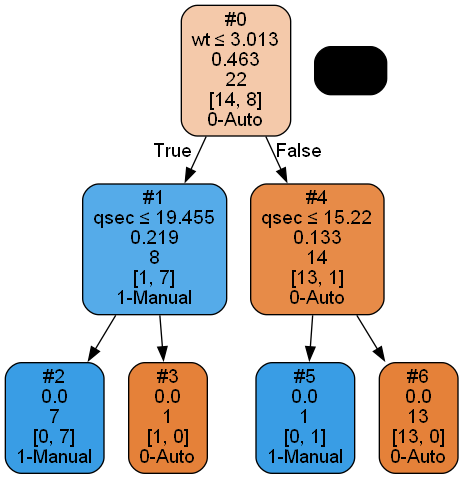

<Figure size 1200x800 with 0 Axes>

In [138]:
dot_data1 = StringIO()
plt.figure(figsize=(12,8))
export_graphviz(clf1, out_file=dot_data1, filled=True, rounded=True, node_ids=True, special_characters=True, feature_names = feature_columns1, 
                label=all, rotate=False, leaves_parallel=False,  class_names = ['0-Auto','1-Manual'])
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph1.write_png('mtcarsDT1.png')
Image(graph1.create_png(),  width=600,  height=350, retina=False)

In [139]:
X1_test.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,5,2
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1


In [143]:
#lets us create new data and predict wether car will be auto or manual
X1_test_new = pd.DataFrame({'mpg':[20,18], 'cyl':[4,6], 'disp':[100,200], 'hp':[120, 80], 'drat':[3.5, 4], 'wt':[15,17], 'qsec':[15,17],
                            'vs':[0,1],  'gear':[3,5], 'carb':[2,3]})
print(X1_test_new)

   mpg  cyl  disp   hp  drat  wt  qsec  vs  gear  carb
0   20    4   100  120   3.5  15    15   0     3     2
1   18    6   200   80   4.0  17    17   1     5     3


In [144]:
pd.Series(clf1.predict(X1_test_new), name='NewPredicted' )

0    1
1    0
Name: NewPredicted, dtype: int64

In [145]:
print(pd.concat([X1_test_new, pd.Series(clf1.predict(X1_test_new), name='NewPredicted' )], axis=1))

   mpg  cyl  disp   hp  drat  wt  qsec  vs  gear  carb  NewPredicted
0   20    4   100  120   3.5  15    15   0     3     2             1
1   18    6   200   80   4.0  17    17   1     5     3             0


<AxesSubplot:xlabel='wt', ylabel='Count'>

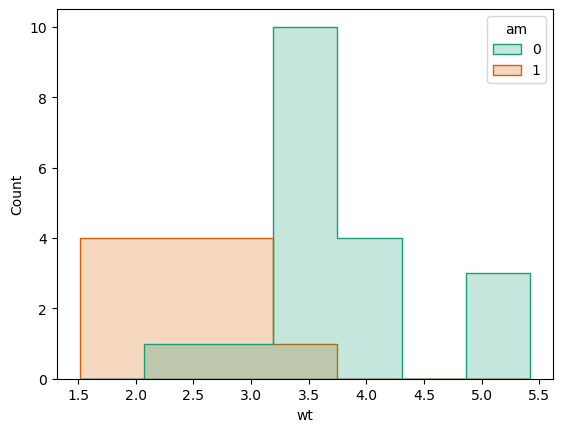

In [102]:
## Visualise : how
sns.histplot(data=df, x="wt", hue="am", palette="Dark2", element='step')

## Regression Tree
Predict mpg on other IVs

In [51]:
from collections import Counter

In [52]:
# class - am 
X2 = df.drop(['mpg'], axis=1) #df.drop(['A'], axis=1)
y2 = df['mpg']
print(pd.concat([X2,y2], axis=1)[1:5])

                   cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb   mpg
Mazda RX4 Wag        6  160.0  110  3.90  2.875  17.02   0   1     4     4  21.0
Datsun 710           4  108.0   93  3.85  2.320  18.61   1   1     4     1  22.8
Hornet 4 Drive       6  258.0  110  3.08  3.215  19.44   1   0     3     1  21.4
Hornet Sportabout    8  360.0  175  3.15  3.440  17.02   0   0     3     2  18.7


In [53]:
feature_columns2 = X2.columns
#target_label = Counter(y)
print(feature_columns2)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')


In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size =.3, random_state=1)
# 70% to training the model

In [55]:
print(X2_train.shape, y2.shape, X2_test.shape)

(22, 10) (32,) (10, 10)


In [56]:
print(pd.concat([X2_train, y2_train], axis=1).head())

                   cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb   mpg
Pontiac Firebird     8  400.0  175  3.08  3.845  17.05   0   0     3     2  19.2
Merc 280C            6  167.6  123  3.92  3.440  18.90   1   0     4     4  17.8
Toyota Corona        4  120.1   97  3.70  2.465  20.01   1   0     3     1  21.5
Porsche 914-2        4  120.3   91  4.43  2.140  16.70   0   1     5     2  26.0
Hornet Sportabout    8  360.0  175  3.15  3.440  17.02   0   0     3     2  18.7


In [57]:
# Model
from sklearn.tree import DecisionTreeRegressor
clf2 = DecisionTreeRegressor(max_depth=3)
clf2 = clf2.fit(X2_train, y2_train)
print(clf2)

DecisionTreeRegressor(max_depth=3)


In [58]:
y2_pred = clf2.predict(X2_test)

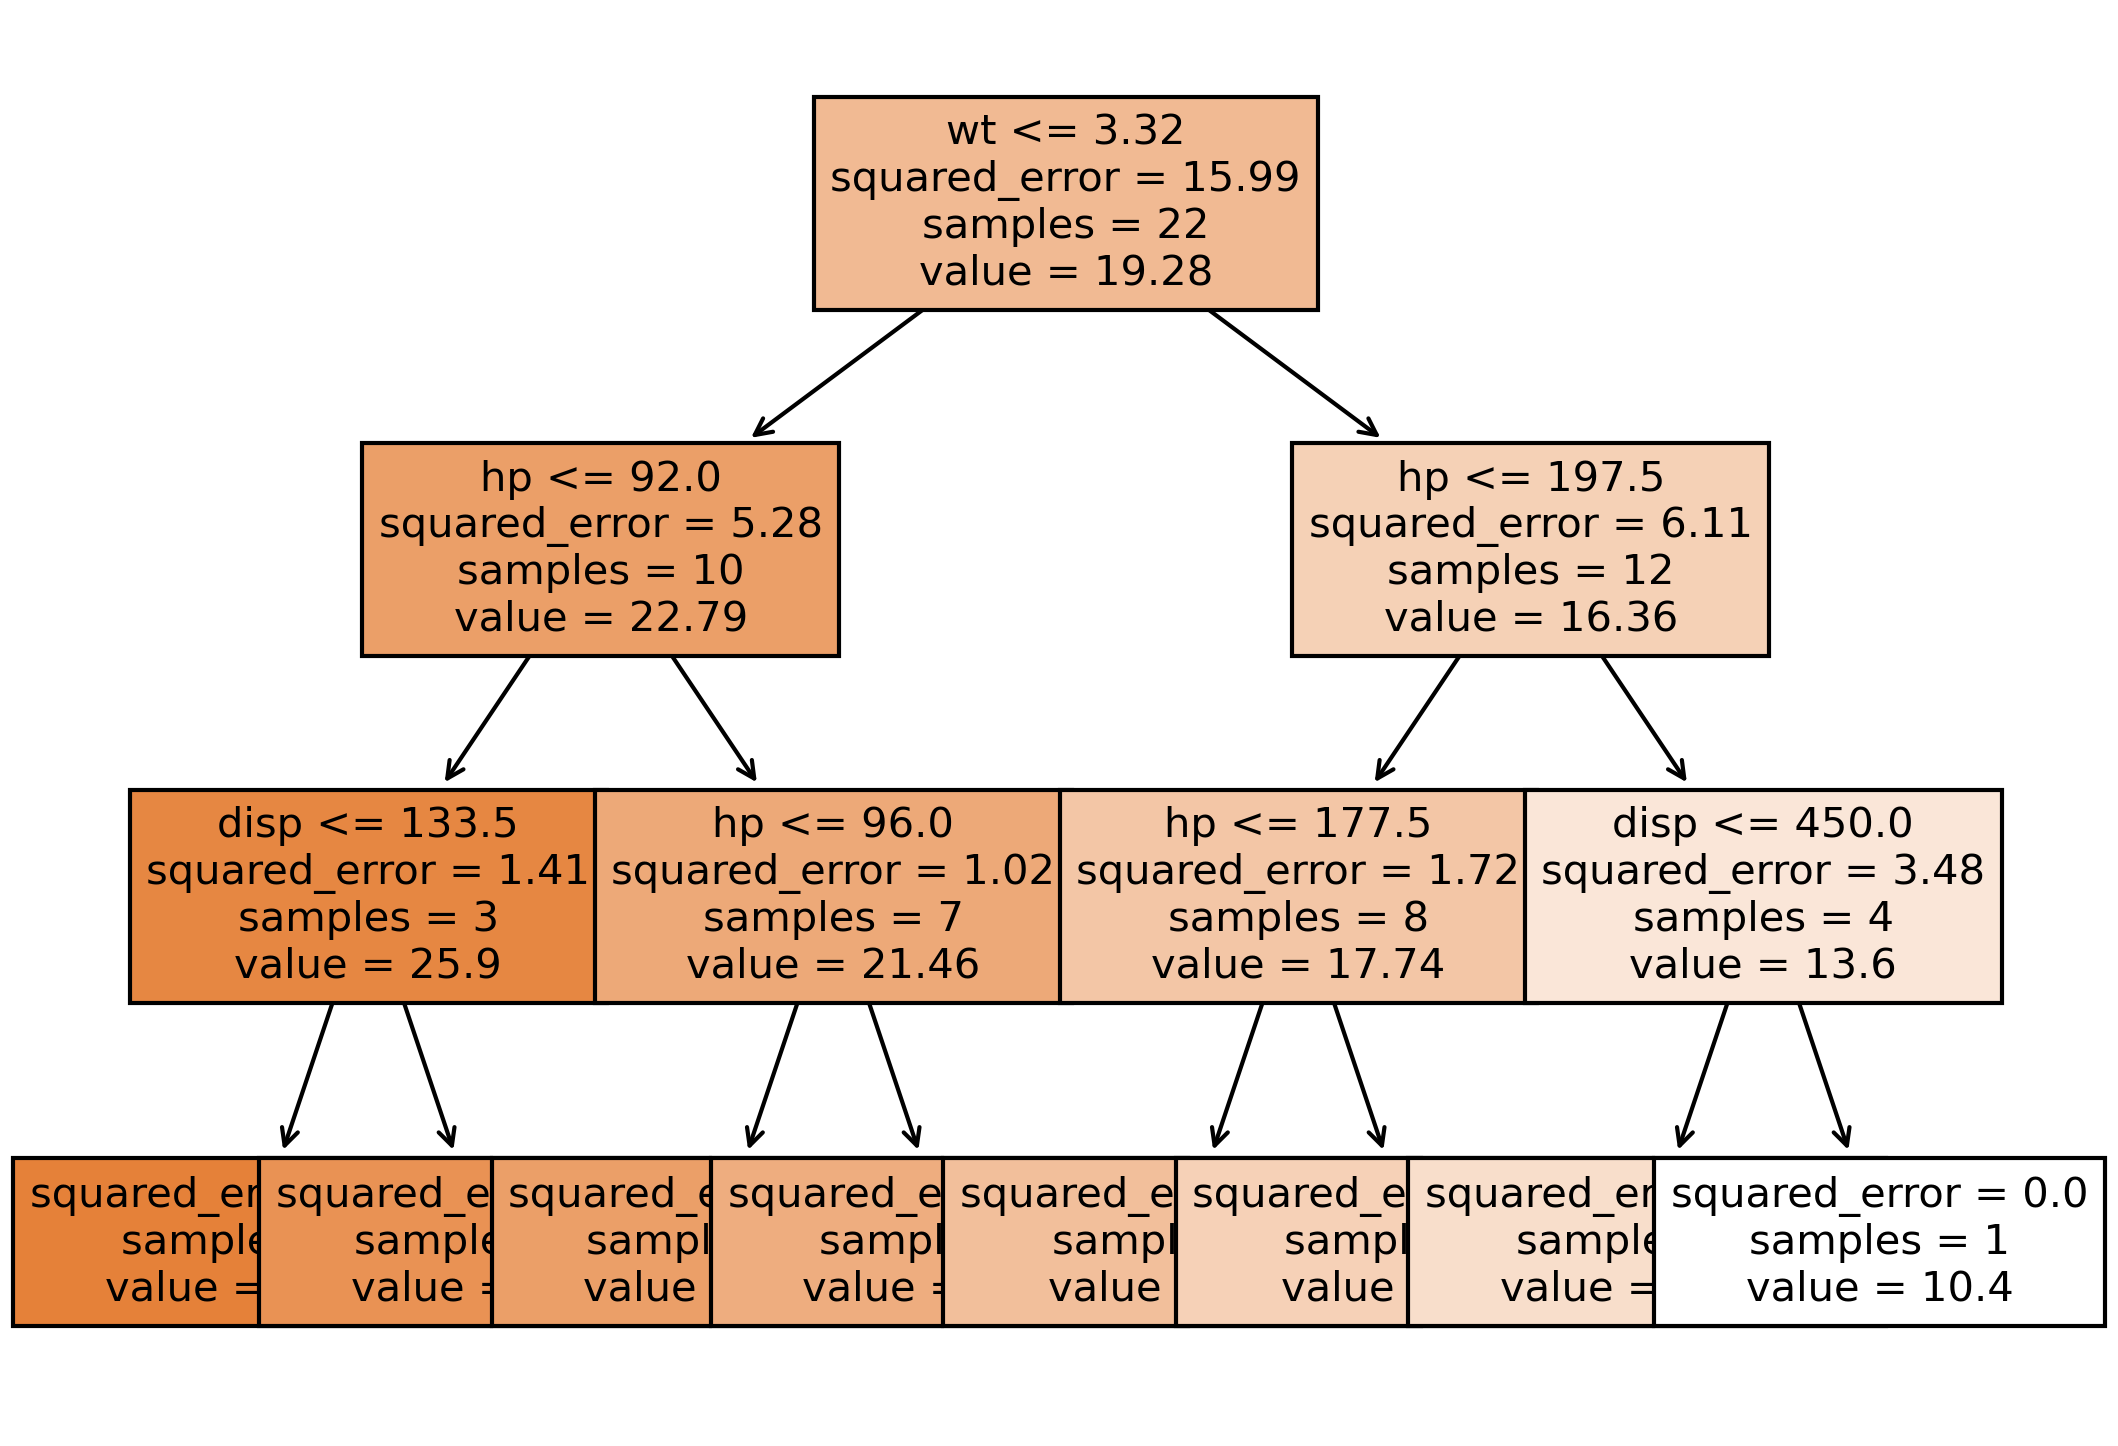

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6), dpi=300)
plot_tree(clf2, feature_names=X2.columns, fontsize=10, filled=True, precision=2);

In [60]:
from sklearn.tree import export_text
r2 = export_text(clf2, feature_names=feature_columns2.to_list(), spacing=4, show_weights=True)
print(feature_columns2)
print(r2)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
|---- wt <= 3.32
|    |---- hp <= 92.00
|    |    |---- disp <= 133.50
|    |    |    |---- value: [26.65]
|    |    |---- disp >  133.50
|    |    |    |---- value: [24.40]
|    |---- hp >  92.00
|    |    |---- hp <= 96.00
|    |    |    |---- value: [22.80]
|    |    |---- hp >  96.00
|    |    |    |---- value: [20.92]
|---- wt >  3.32
|    |---- hp <= 197.50
|    |    |---- hp <= 177.50
|    |    |    |---- value: [18.60]
|    |    |---- hp >  177.50
|    |    |    |---- value: [16.30]
|    |---- hp >  197.50
|    |    |---- disp <= 450.00
|    |    |    |---- value: [14.67]
|    |    |---- disp >  450.00
|    |    |    |---- value: [10.40]



In [61]:
# Advanced Visualisation
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'E:\analytics\Graphviz\bin'

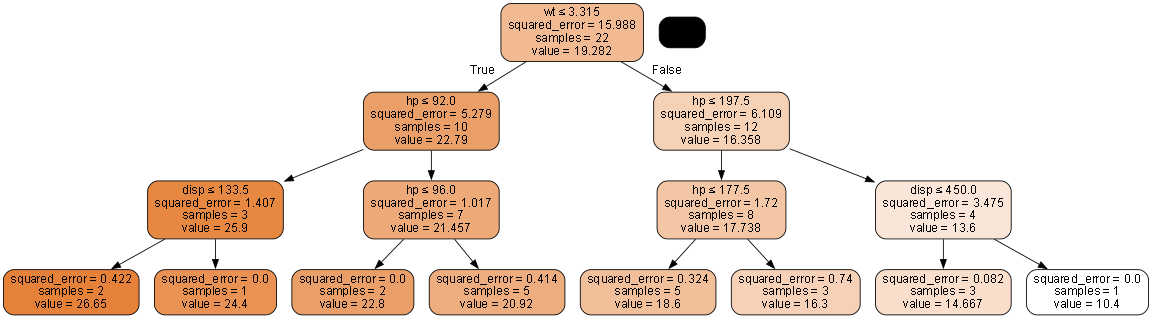

<Figure size 2400x2400 with 0 Axes>

In [62]:
dot_data2 = StringIO()
plt.figure(figsize=(8,8), dpi=300)
export_graphviz(clf2, out_file=dot_data2, filled=True, rounded=True, special_characters=True, feature_names = feature_columns2)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())
graph2.set_size('"12,12!"')
graph2.write_png('mtcarsDT2.png')
Image(graph2.create_png(), width=800, height=500)

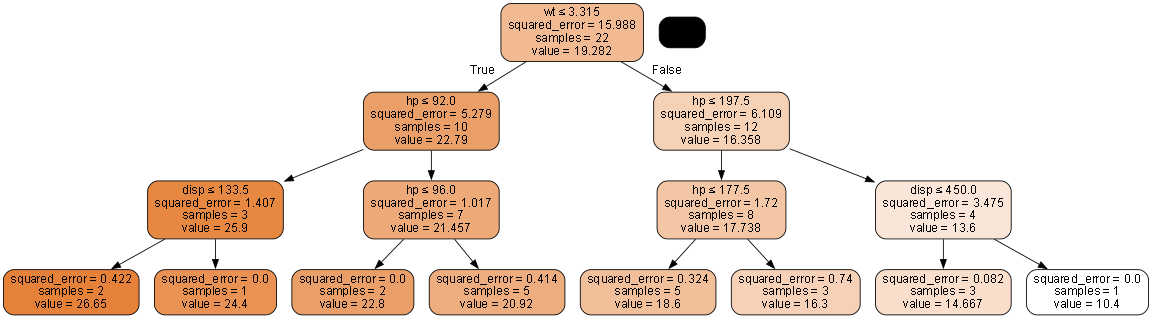

In [63]:
Image(filename='mtcarsDT2.png', width=800, height=500 )

In [64]:
# predict for new data
np.set_printoptions(linewidth=160, precision=2)
clf2.predict(X2_test)

array([20.92, 20.92, 18.6 , 26.65, 14.67, 26.65, 18.6 , 20.92, 26.65, 10.4 ])

In [65]:
X2_test.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lotus Europa,4,95.1,113,3.77,1.513,16.90,1,1,5,2
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
AMC Javelin,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Honda Civic,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Camaro Z28,8,350.0,245,3.73,3.840,15.41,0,0,3,4


In [66]:
X2_test_new = pd.DataFrame({'cyl':[4,6], 'disp':[100,200], 'hp':[120, 80], 'drat':[3.5, 4], 'wt':[15,17], 'qsec':[15,17],
                            'vs':[0,1], 'am':[0,1], 'gear':[3,5], 'carb':[2,3]})
print(X2_test_new)

   cyl  disp   hp  drat  wt  qsec  vs  am  gear  carb
0    4   100  120   3.5  15    15   0   0     3     2
1    6   200   80   4.0  17    17   1   1     5     3


In [67]:
pd.Series(clf2.predict(X2_test_new), name='NewPredicted' )

0    18.6
1    18.6
Name: NewPredicted, dtype: float64

In [68]:
print(pd.concat([X2_test_new, pd.Series(clf2.predict(X2_test_new), name='NewPredicted' )], axis=1))

   cyl  disp   hp  drat  wt  qsec  vs  am  gear  carb  NewPredicted
0    4   100  120   3.5  15    15   0   0     3     2          18.6
1    6   200   80   4.0  17    17   1   1     5     3          18.6


### Feature Importance - RT
predict mpg from other variables

In [69]:
#print(clf1.feature_importances_)
FI2= pd.DataFrame({'importance':clf2.feature_importances_, 'feature':X2_train.columns}).sort_values(by='importance', 
                                                                                                    ascending=False)
print(FI2)

   importance feature
4    0.654520      wt
2    0.296085      hp
1    0.049396    disp
0    0.000000     cyl
3    0.000000    drat
5    0.000000    qsec
6    0.000000      vs
7    0.000000      am
8    0.000000    gear
9    0.000000    carb


### see the logic of splitting
print(r2)

In [91]:
X2.head()
pd.cut(X2['wt'], bins=2)[1:5]

Mazda RX4 Wag        (1.509, 3.468]
Datsun 710           (1.509, 3.468]
Hornet 4 Drive       (1.509, 3.468]
Hornet Sportabout    (1.509, 3.468]
Name: wt, dtype: category
Categories (2, interval[float64, right]): [(1.509, 3.468] < (3.468, 5.424]]

In [77]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [92]:
np.histogram(df.wt, bins=[0, 1, 2, 3])

(array([0, 4, 8], dtype=int64), array([0, 1, 2, 3]))

<AxesSubplot:>

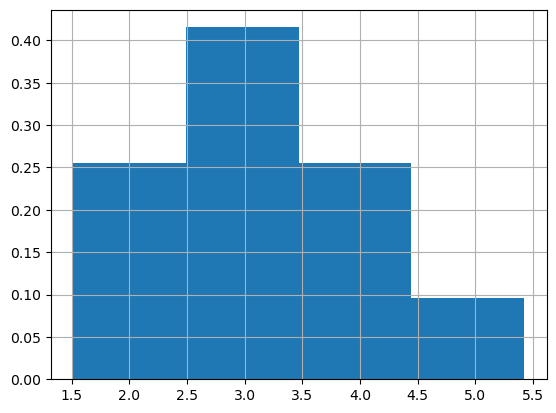

In [98]:
df.wt.hist(bins=4, density=True)

<AxesSubplot:xlabel='wt', ylabel='Count'>

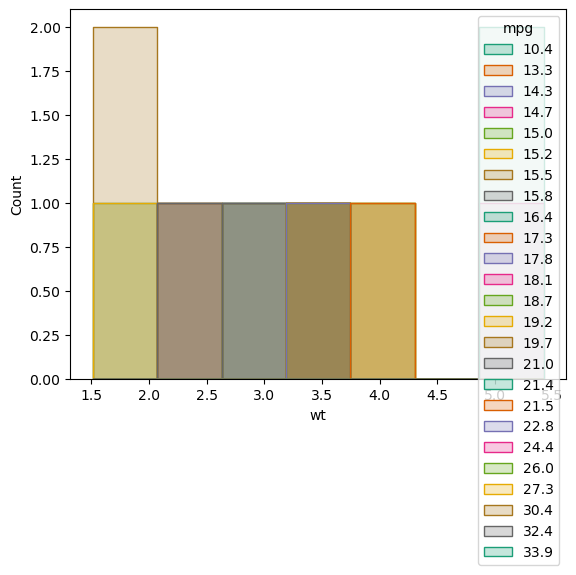

In [101]:
sns.histplot(data=df, x="wt", hue="mpg", palette="Dark2", element='step')

In [103]:
pd.qcut(df['wt'], q=4, precision=2, retbins=True, labels=['I1','I2','I3','I4'])[1:5]

(array([1.51, 2.58, 3.33, 3.61, 5.42]),)

In [106]:
pd.cut(df['wt'], bins=4).value_counts()

(2.491, 3.468]    13
(1.509, 2.491]     8
(3.468, 4.446]     8
(4.446, 5.424]     3
Name: wt, dtype: int64

In [108]:
pd.cut(df['wt'], bins=[0, 3.3,6]).value_counts()

(0.0, 3.3]    16
(3.3, 6.0]    16
Name: wt, dtype: int64

In [ ]:
### Partition data in 2 ways, wt[0,3.3, 6] and mpg[0,19,34]

In [158]:
X2_train_copy = X2_train.copy()
X2_train_copy['X2cutWt'] = pd.cut(X2_train['wt'], bins=[0, 3.3,6])
X2_train_copy['X2cutMpg'] = pd.cut(X2_train['wt'], bins=[0, 19.28, 34])
X2_train_copy = pd.concat([X2_train_copy, y2_train], axis=1)
X2_train_copy.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,X2cutWt,X2cutMpg,mpg
Pontiac Firebird,8,400.0,175,3.08,3.845,17.05,0,0,3,2,"(3.3, 6.0]","(0.0, 19.28]",19.2
Merc 280C,6,167.6,123,3.92,3.440,18.90,1,0,4,4,"(3.3, 6.0]","(0.0, 19.28]",17.8
Toyota Corona,4,120.1,97,3.70,2.465,20.01,1,0,3,1,"(0.0, 3.3]","(0.0, 19.28]",21.5
Porsche 914-2,4,120.3,91,4.43,2.140,16.70,0,1,5,2,"(0.0, 3.3]","(0.0, 19.28]",26.0
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2,"(3.3, 6.0]","(0.0, 19.28]",18.7


In [161]:
X2_train_copy.groupby(['X2cutMpg']).size()

X2cutMpg
(0.0, 19.28]     22
(19.28, 34.0]     0
dtype: int64

In [160]:
X2_train_copy.groupby(['X2cutWt','X2cutMpg']).size()

X2cutWt     X2cutMpg     
(0.0, 3.3]  (0.0, 19.28]     10
            (19.28, 34.0]     0
(3.3, 6.0]  (0.0, 19.28]     12
            (19.28, 34.0]     0
dtype: int64

<AxesSubplot:xlabel='wt', ylabel='mpg'>

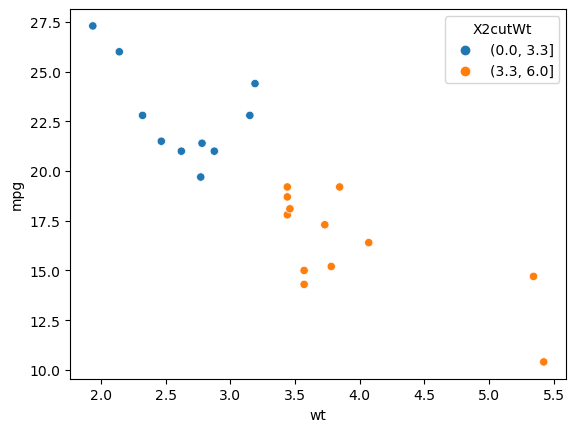

In [144]:
sns.scatterplot(x='wt', y='mpg', data=X2_train_copy, hue='X2cutWt') #, c=X2_train_copy['X2cutWt'])

In [156]:
from plotnine import *
g = ggplot(X2_train_copy, aes(x='wt', y='mpg')) + geom_point(stat='summary') + facet_wrap('~ X2cutWt + X2cutMpg', ncol=2, labeller='label_both')

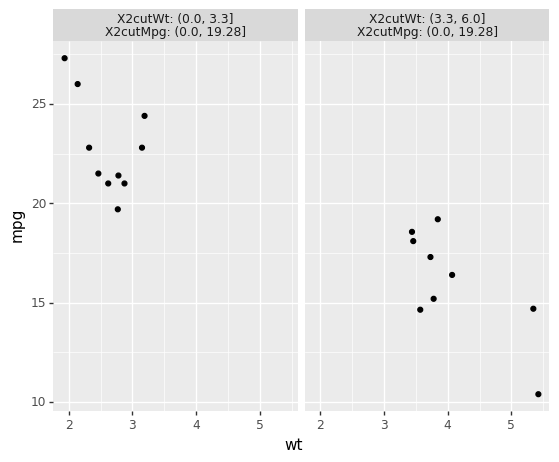

In [157]:
print(g)

array([<AxesSubplot:title={'center':'(0.0, 3.3]'}, ylabel='Frequency'>, <AxesSubplot:title={'center':'(3.3, 6.0]'}, ylabel='Frequency'>], dtype=object)

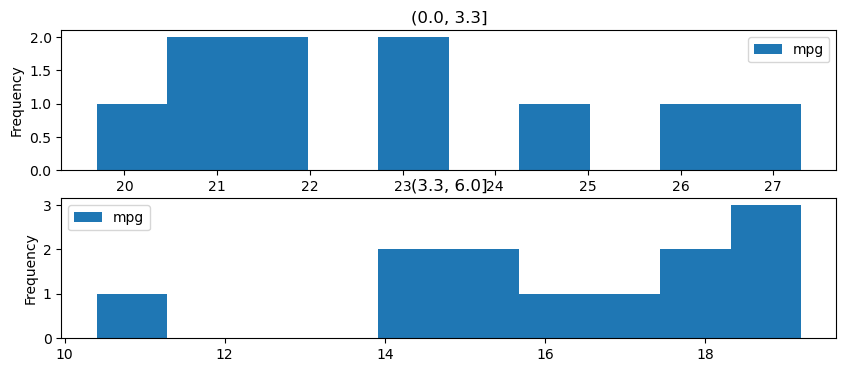

In [122]:
X2_train_copy.plot.hist(column=["mpg"], by="X2cutWt", figsize=(10, 4))

<AxesSubplot:xlabel='mpg', ylabel='Count'>

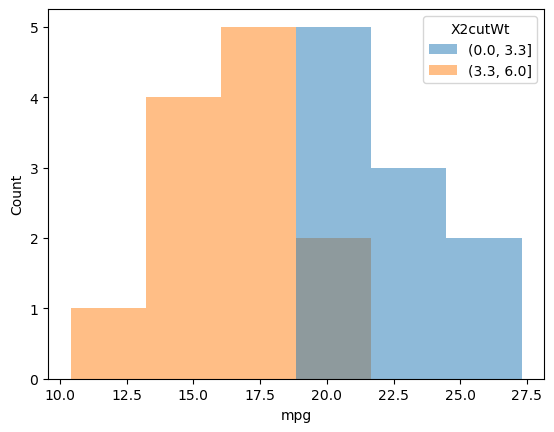

In [124]:
sns.histplot(data=X2_train_copy, x='mpg', hue='X2cutWt', stat='count', edgecolor=None)

<AxesSubplot:xlabel='wt', ylabel='Count'>

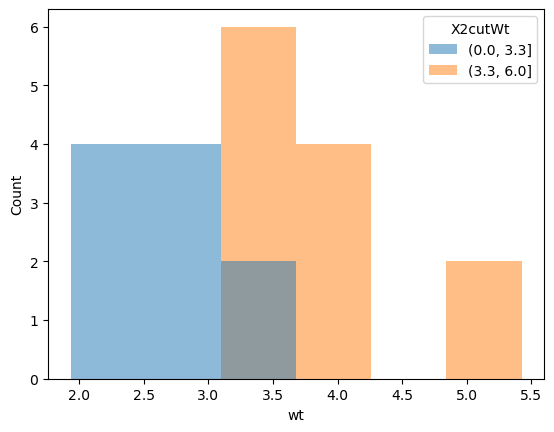

In [125]:
sns.histplot(data=X2_train_copy, x='wt', hue='X2cutWt', stat='count', edgecolor=None)